# Challenge Data Science - Setembro 2022

**Identificar pacientes com alto risco cardiovascular**

Autor: Jorge Chamby Diaz
_________

## O Problema

As doenças cardiovasculares (DCVs) são a causa número 1 de morte em todo o mundo, levando cerca de 17,9 milhões de vidas a cada ano, o que representa 31% de todas as mortes em todo o mundo. Quatro de cada 5 mortes por CVDs são devido a ataques cardíacos e derrames, e um terço dessas mortes ocorre prematuramente em pessoas com menos de 70 anos de idade. 

Pessoas com doença cardiovascular ou com alto risco cardiovascular (devido à presença de um ou mais fatores de risco, como hipertensão, diabetes, hiperlipidemia ou doença já estabelecida) precisam de detecção e gerenciamento precoces, onde um modelo de aprendizado de máquina pode ser de grande ajuda.

## Os dados

A insuficiência cardíaca é um evento comum causado por DCVs e este conjunto de dados contém 11 características que podem ser usadas para prever uma possível doença cardíaca:

- Medidas de 11 variáveis que caracterizam cada amostra (as features do problema):
<br><br>
    - 1 - Age: idade do paciente (anos)
    - 2 - Sex: sexo do paciente (M: Masculino, F: Feminino)
    - 3 - ChestPainType: tipo de dor no peito (TA: Angina Típica, ATA: Angina Atípica, NAP: Dor Não Anginosa, ASY: Assintomática)
    - 4 - RestingBP: pressão arterial de repouso (mm Hg)
    - 5 - Cholesterol: colesterol sérico (mm/dl)
    - 6 - FastingBS: glicemia em jejum (1: se FastingBS > 120 mg/dl, 0: caso contrário)
    - 7 - RestingECG: resultados do eletrocardiograma de repouso (Normal: normal, ST: com anormalidade da onda ST-T, LVH: mostrando provável ou definitiva hipertrofia ventricular esquerda pelos critérios de Estes)
    - 8 - MaxHR: frequência cardíaca máxima alcançada (Valor numérico entre 60 e 202)
    - 9 - ExerciseAngina: angina induzida por exercício (Y: Sim, N: Não)
    - 10 - Oldpeak: pico antigo = ST (Valor numérico medido em depressão)
    - 11 - ST_Slope: a inclinação do segmento ST do exercício de pico (Up: upsloping, Flat: flat, Down: downsloping)    
<br><br>
- Além disso, há a variável resposta que no caso é uma variável binária:
<br><br>
    - 12 - HeartDisease: classe de saída (1: doença cardíaca, 0: normal)

Para maiores informações sobre a coleta e origem dos dados, veja a página do dataset no repositório UCI machine learning repository, [disponível aqui!](https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/) 

**Para baixar os conjuntos de dados, podem acessar diretamente a este [link](https://github.com/jchambyd/Datasets/tree/main/Heart-disease)**

## O Challenge

Suponha que você é um cientista de dados que trabalha na área de *bioinformatica* de uma clínica especializada no tratamento de doenças cardiovasculares. Nos últimos meses a empresa tem recebido uma grande quantidade de pacientes (o que é muito bom!), permitindo gerar um histórico de todos os pacientes que foram para consulta e saíram com um diagnóstico. Para simplificar as coisas, o diagnóstico foi reduzido a duas possíveis respostas: 'positivo' ou 'negativo'. Positivo significa que o paciente apresenta alguma doença cardiovascular, e negativo significa que a pessoa está livre de doenças cardiovasculares. A empresa pede para você construir um modelo preditivo que permita, a partir de um conjunto prévio de exames feitos sobre um paciente novo, identificar se o paciente possui ou não uma doença cardiovascular.

Com este modelo, os médicos vão ter uma ferramenta de apoio muito útil para realizar o diagnóstico de doenças cardiovasculares para novos pacientes que a clínica receba no futuro.

Dentro deste contexto, seu objetivo como cientista de dados é claro:

> Agregar valor ao negócio, explorando os dados que você tem à disposição.

Na primeira sprint do projeto, você e outros colegas do time de ciência de dados chegaram na seguinte _TO-DO list_ para o projeto. Algumas atividades já foram executadas nas primeiras semanas de trabalho (o time é muito bom!), mas agora ainda restam algumas atividades muito importantes (e divertidas!) a serem feitas:

- [x] Ingestão dos dados e detalhada análise exploratória
- [x] Formulação do problema
- [ ] Primeiro modelo baseline
- [ ] Iterações pelo ciclo de modelagem
- [ ] Compílação dos resultados para o negócio
- [ ] Comunicação dos resultados

Bom trabalho, e divirta-se! :D


In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import random as rd
import matplotlib.patches as mpatches
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

import matplotlib.style as stl
from pandas_profiling import ProfileReport
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score   

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import  RandomizedSearchCV, train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
import os
import csv

In [42]:
#FUNÇÕES BÁSICAS
def identifica_extensao(endereco):
    extensao=(os.path.splitext(endereco)[1])[1:]
    return extensao

def find_delimiter(filename):
    sniffer = csv.Sniffer()
    with open(filename) as fp:
        delimiter = sniffer.sniff(fp.read(5000)).delimiter
    fp.close
    return delimiter

#sim eu estou reaproveirando esta função de outro programa que eu fiz :P   
def abre_arquivo(endereco, extensao):
    if extensao=="csv":
        try:
            df=pd.read_csv(endereco, encoding=open(endereco).encoding, sep=find_delimiter(endereco))
            return df
          
        except Exception as e:
            #Se der ruim devolvo o erro para meu desespero
            return e
                
    elif extensao=="xlsx":        
        try:
            df=pd.read_excel(endereco, encoding=open(endereco).encoding)
            return df
        except Exception as e:
            return e
    else:
        print("Extensão não suportada, por favor carrege um arquivo csv ou xlsx")
        return False

def g_coor(df):
    plt.figure(figsize=(20,12))
    sns.set_context('notebook',font_scale = 1.3)
    sns.set_theme()
    matrix = np.triu(df.corr())
    sns.heatmap(df.corr(),annot=True,linewidth =2,mask=matrix)
    plt.tight_layout()

def rd_forest(colunas, df, target):
    if len(colunas)>0:
        df=df[colunas]    

    X = df.drop(target, axis=1)
    y = df[target]

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3) # 70% training and 30% test
    #Create a Gaussian Classifier
    clf=RandomForestClassifier(n_estimators=100)
    #Train the model using the training sets y_pred=clf.predict(X_test)
    clf.fit(X_train,y_train)

    y_pred=clf.predict(X_test)

    return y_pred, y_test

def knn_teste(colunas, df, target):
    if len(colunas)>0:
        df=df[colunas]
        
    X = df.drop(target, axis=1)
    y = df[target]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
    knn = KNeighborsClassifier(n_neighbors = 10)
    knn.fit(X_train,y_train)
    y_pred1 = knn.predict(X_test)

    return y_test,y_pred1

In [ ]:
fonte_heart_part1="heart_part1.csv"
fonte_heart_part2="heart_part2.csv"
fonte_heart="heart.csv"

#abrindo os arquiivos

df_heart_part1=abre_arquivo(fonte_heart_part1,identifica_extensao(fonte_heart_part1))
df_heart_part2=abre_arquivo(fonte_heart_part2, identifica_extensao(fonte_heart_part2))
df_heart=abre_arquivo(fonte_heart, identifica_extensao(fonte_heart))

df_all_data=pd.concat((df_heart_part1,df_heart_part2), axis=0)

df_all_data=df_all_data.drop("index", axis=1)
#simplificando para ocupar menos memoória
df_all_data["Age"] = df_all_data.Age.astype(np.int16)
df_all_data["RestingBP"] = df_all_data.RestingBP.astype(np.int16)
df_all_data["Cholesterol"] = df_all_data.Cholesterol.astype(np.int16)
df_all_data["FastingBS"] = df_all_data.FastingBS.astype(np.int16)
df_all_data["MaxHR"] = df_all_data.MaxHR.astype(np.int16)
df_all_data["HeartDisease"] = df_all_data.HeartDisease.astype(np.int16)

Após agrupar os dois dataframes, vamos analisar um resumo do arquivo e vamos direto à correlação

In [35]:
df_all_data.head()


Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  MaxHR  \
0   40   M           ATA        140          289          0     Normal    172   
1   49   F           NAP        160          180          0     Normal    156   
2   37   M           ATA        130          283          0         ST     98   
3   48   F           ASY        138          214          0     Normal    108   
4   54   M           NAP        150          195          0     Normal    122   

  ExerciseAngina  Oldpeak ST_Slope  HeartDisease  
0              N      0.0       Up             0  
1              N      1.0     Flat             1  
2              N      0.0       Up             0  
3              Y      1.5     Flat             1  
4              N      0.0       Up             0

Analisando as "generalidades" do dataframe

In [36]:
ProfileReport(df_all_data)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Apesar do Profiling informar muita coisa, bem como as correlações, vamos dar uma olhada de perto nela:

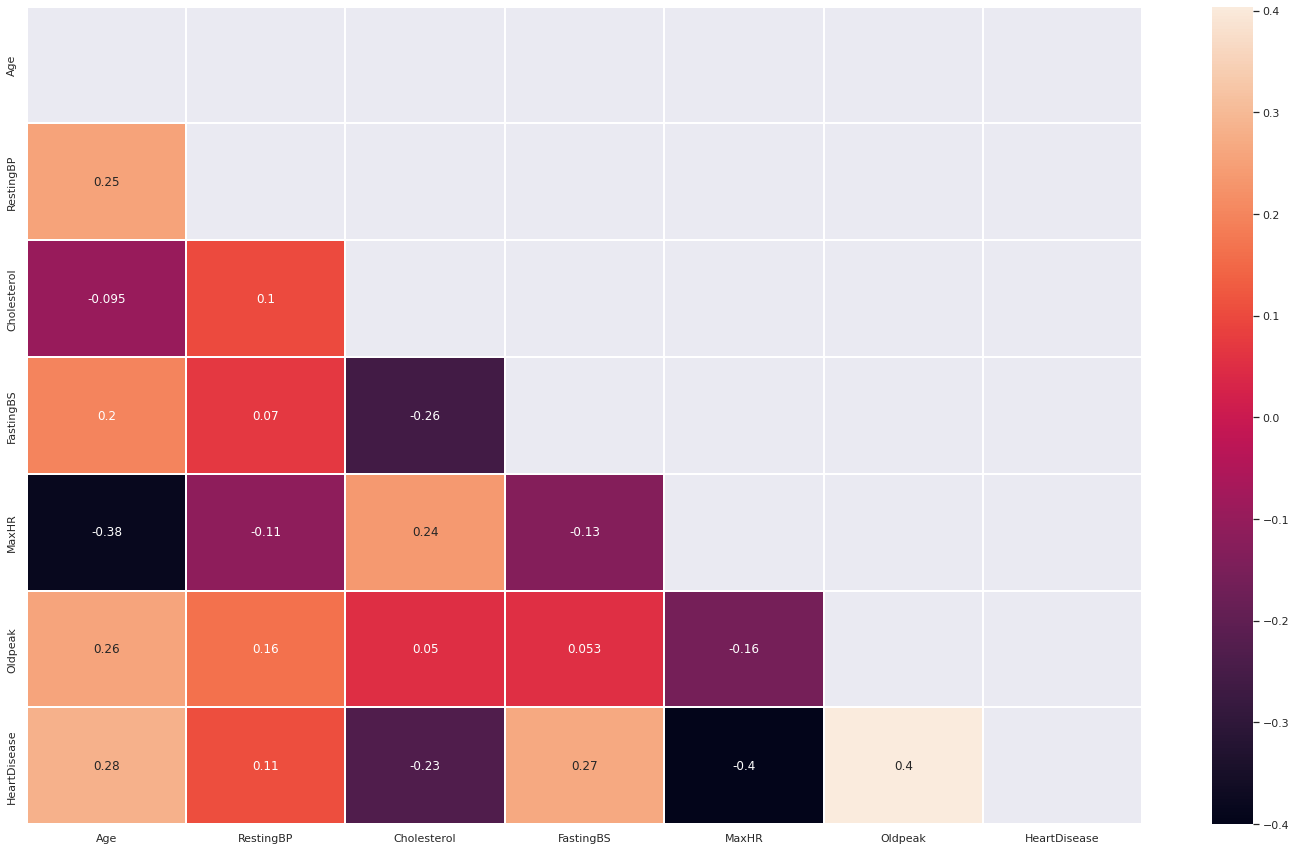

In [43]:
sns.set_theme()
g_coor(df_all_data)

A correlação não é lá essas coisas, denso que a maior .04 (módulo). Pra fins de claresa, vejamos somene o nosso objetivo: HeartDisease

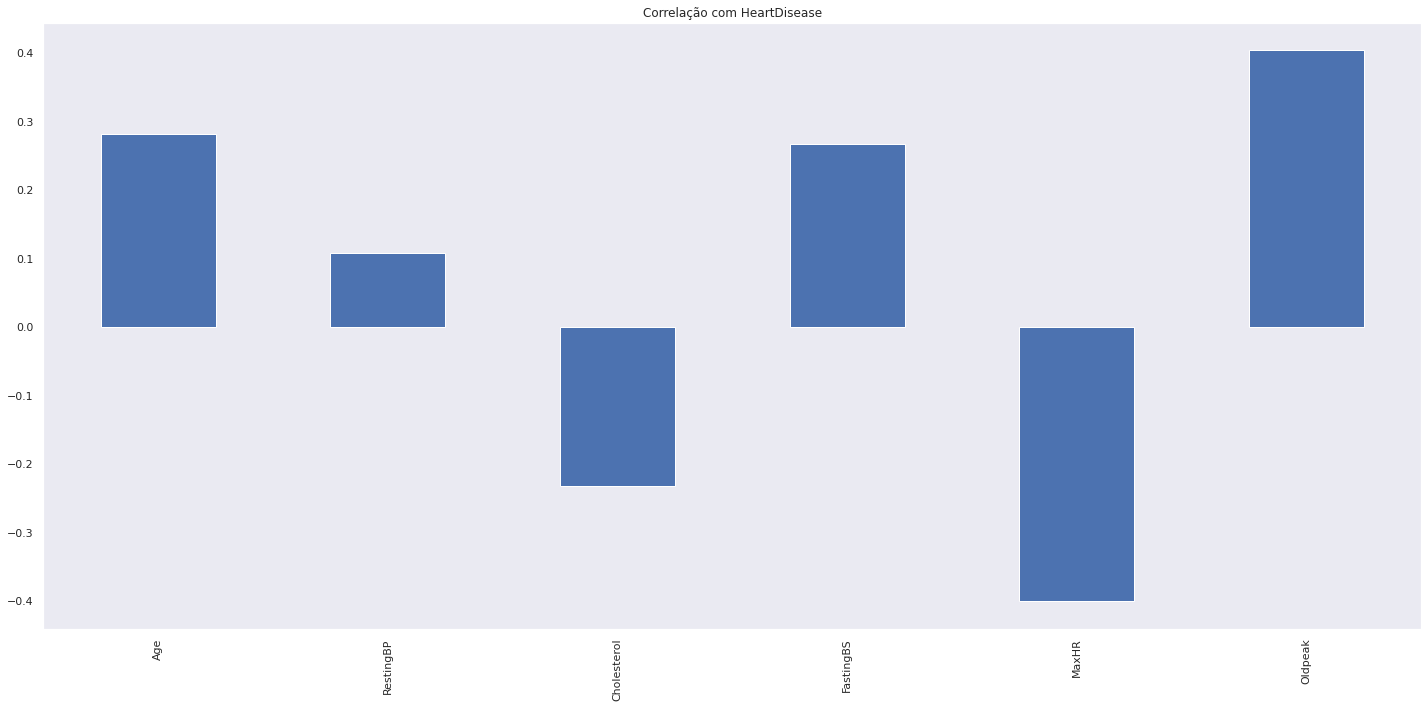

In [40]:
sns.set_context('notebook',font_scale = 2.3)
sns.set_theme()
df_sem_target=df_all_data.drop('HeartDisease', axis=1)
df_sem_target.corrwith(df_all_data.HeartDisease).plot(kind='bar', grid=False, figsize=(20, 10), title="Correlação com HeartDisease" )
plt.tight_layout()

Pois é. Isso significa que nao podemos esperar um modelo muito preciso. Um modelo é real com precisão entre 70-90%. Assim, para que o modelo seja praticável ele deve ter pelo o minimo de 70%.

Considerando que trada de uma base de dados rotulada e discreta o modelo mais indicado será o supervisionado com um modelod de regressão.

A questão principal é: dados estas informações, o paciente terá ou não doença cardíacada.

Uma decisção do tipo SIM/NÃO no qual um algoritimo de árvore de decisão é bem vindo, assim entendo que o Random Forest é a ferramenta mais indicada par ao trabalho, porém como contramedida dse comparação será aplicado o KNN e comparar os resultados.

Como se viu, o dataframe possui alta correlção nas variáveis numéricas. Considerando que já houve uma "limpeza"e que os dados resta saber se os dados literais podem ser usados para melhorar a performance do modelo. 
Assim, façamos uma comparação.

PRIMEIRO SOMENTE COM OS DADOS INICIALMENTE INTEIROS

In [44]:
colunas=[]
for col in df_all_data.columns.unique():
    if df_all_data[col].dtype== np.dtype('int16'):
        colunas.append(col)

pred_rd_forest, teste_rd_forest=rd_forest(colunas, df_all_data, "HeartDisease")
pred_knn, teste_knn=knn_teste(colunas, df_all_data,"HeartDisease")

print("A precisão do Randrom Foresto ficou em: {}".format(accuracy_score(teste_rd_forest,pred_rd_forest)))
print("A precisão do KNN ficou em: {}".format(accuracy_score(teste_knn,pred_knn)))

A precisão do Randrom Foresto ficou em: 0.7028985507246377
A precisão do KNN ficou em: 0.6847826086956522


O Random Forest teve um desempenho melhor, e a precisão entre 70% e 90% podem ser considerados realísticos. Mas nosso resulatdo ficou no liminar do aceitável e está muito genérico genérico (underfiting).

Vamos tentar melhorar isso substituindo as strings por inteiros como "peso" de cada tipo de resultado. Pode parecer "holístico" mas considerando que o Ramdom Forest é uma combinação de árvores de decisãos, vale a tentativa.

Obviamente não sou médico ( e aqui pode estar o calcanhar de aquiles desta ação), mas o que conta é a correlaçao entre dados, assim, em tese, os valores, mesmo que aleatórios, podem obter o mesmo resultado

In [45]:
#Escalando as variáveis 
dict_RestingECG= {
                'Normal':1,
                'ST':2,
                'LVH':3,
                }

dict_RestingECG={
                'Normal':0,
                'ST':2,
                'LVH':1,
                }

dict_ST_Slope={
                'Up':2,
                'Flat':1,
                'Down':0,
                }
                
dict_ChestPainType = {
                        "TA":1,
                        "ATA":2,
                        "NAP":3,
                        "ASY":4,
                     }

for pain in df_all_data.ChestPainType.unique():
    df_all_data.ChestPainType=df_all_data.ChestPainType.replace([pain],dict_ChestPainType[pain])

for ECG in df_all_data.RestingECG.unique():
    df_all_data.RestingECG=df_all_data.RestingECG.replace([ECG], dict_RestingECG[ECG])

for slope in df_all_data.ST_Slope.unique():
    df_all_data.ST_Slope=df_all_data.ST_Slope.replace([slope],dict_ST_Slope[slope])

#Para sexo e exercicio, ficou fácill temos somente 2 situações para cada
df_all_data.Sex=df_all_data.Sex.replace(["M","F"],[1,0])
df_all_data.ExerciseAngina=df_all_data.ExerciseAngina.replace(["Y","N"],[1,0])

df_all_data.head()

Age  Sex  ChestPainType  RestingBP  Cholesterol  FastingBS  RestingECG  \
0   40    1              2        140          289          0           0   
1   49    0              3        160          180          0           0   
2   37    1              2        130          283          0           2   
3   48    0              4        138          214          0           0   
4   54    1              3        150          195          0           0   

   MaxHR  ExerciseAngina  Oldpeak  ST_Slope  HeartDisease  
0    172               0      0.0         2             0  
1    156               0      1.0         1             1  
2     98               0      0.0         2             0  
3    108               1      1.5         1             1  
4    122               0      0.0         2             0

Agora que transformei tudo em números (pesos) para fins de correlação

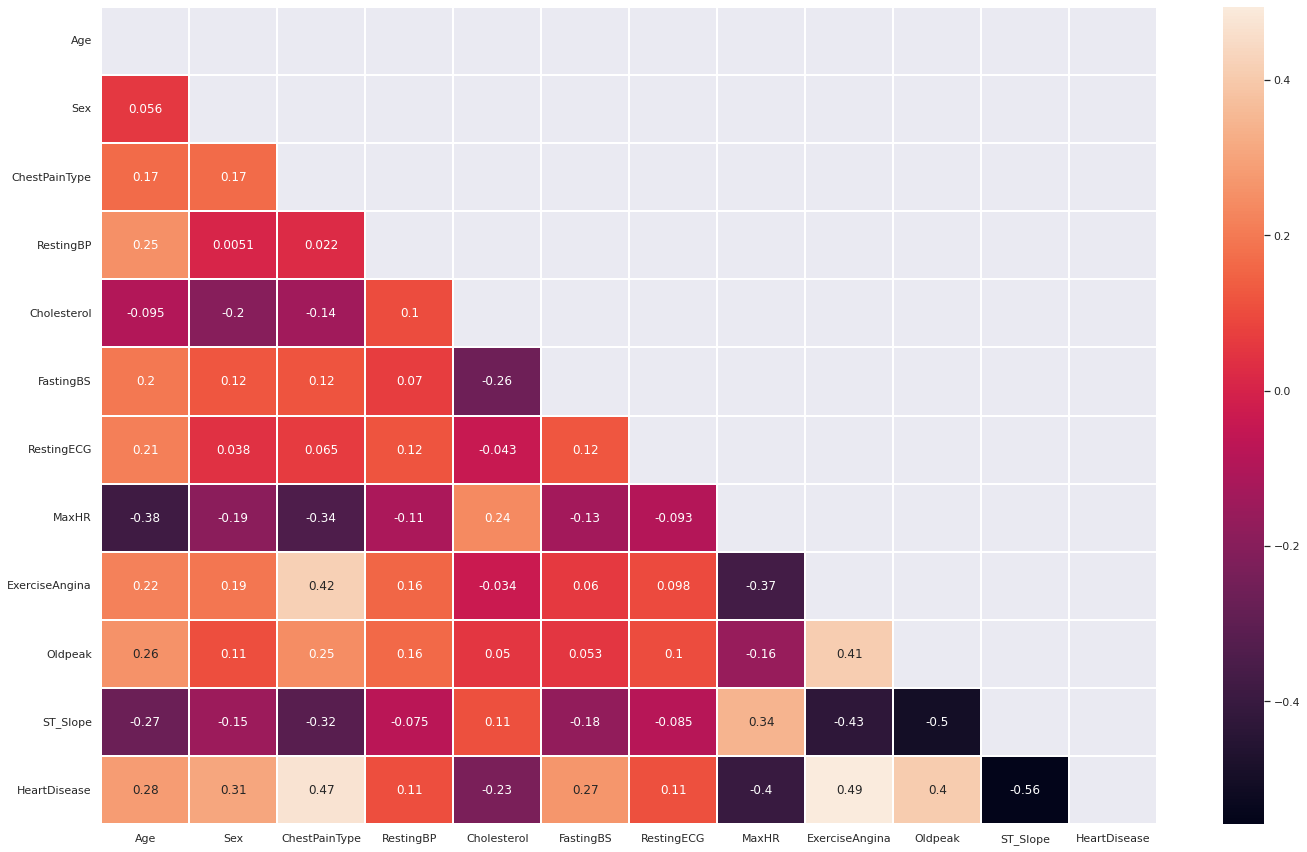

In [46]:
#primeiro vamos transformamos o que temos de string em números
g_coor(df_all_data)

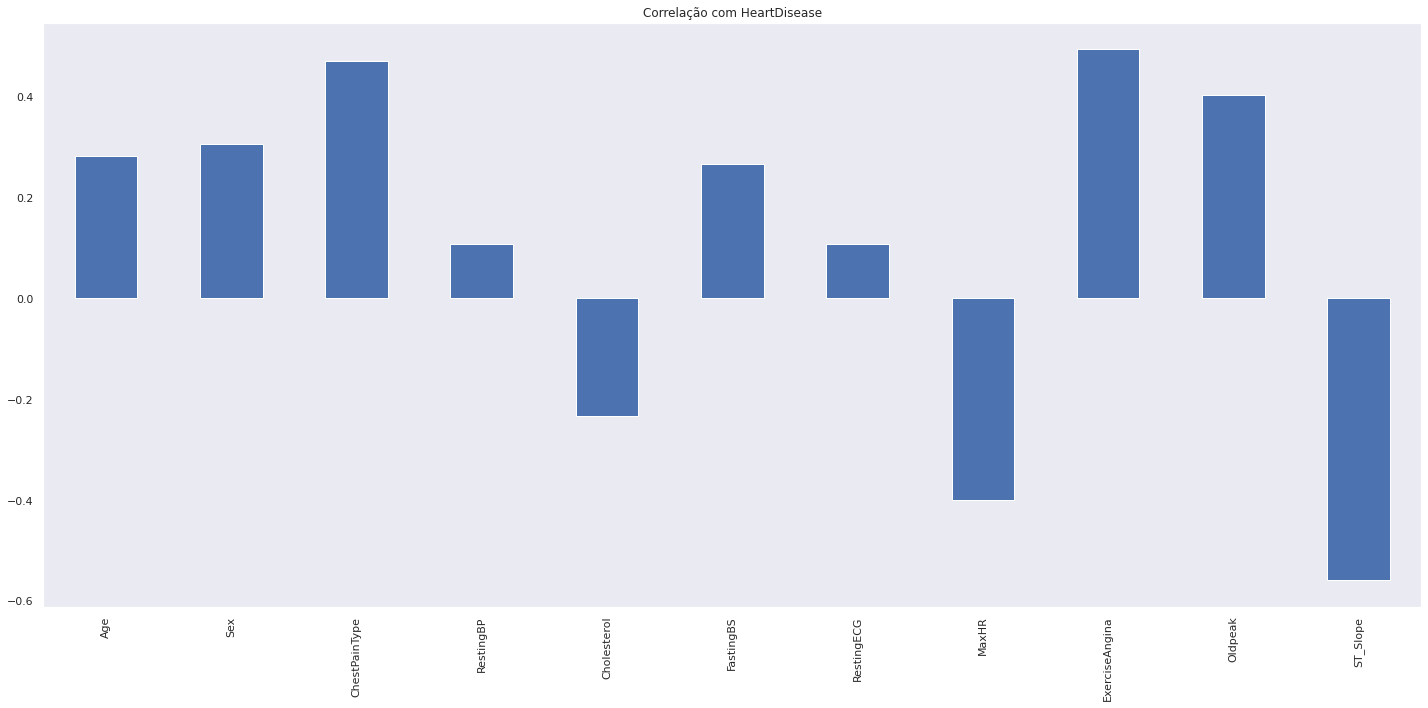

In [47]:
sns.set_context('notebook',font_scale = 2.3)
sns.set_theme()
df_sem_target=df_all_data.drop('HeartDisease', axis=1)
df_sem_target.corrwith(df_all_data.HeartDisease).plot(kind='bar', grid=False, figsize=(20, 10), title="Correlação com HeartDisease" )
plt.tight_layout()

Ao que parece aumentamos no nosso leque de opções no qual a correlação melhorou um pouco. Vamos ver como ficou o nosso modelo com todo o dataframe

In [48]:
colunas=[]


pred_rd_forest, teste_rd_forest=rd_forest(colunas, df_all_data, "HeartDisease")
pred_knn, teste_knn=knn_teste(colunas, df_all_data,"HeartDisease")

print("A precisão do Randrom Foresto ficou em: {}".format(accuracy_score(teste_rd_forest,pred_rd_forest)))
print("A precisão do KNN ficou em: {}".format(accuracy_score(teste_knn,pred_knn)))

A precisão do Randrom Foresto ficou em: 0.8297101449275363
A precisão do KNN ficou em: 0.6847826086956522


O KNN não melhorou muito e ainda ficou abaixo do mínimo aceitável, assim podemos supor que o algoritmo KNN não é indicado para a nossa análise.

Porém o Ramdon Florest melhorou em 12% e ficou em uma faixa plenamente aceitável.

Assim apresentamos um modelo de predição com 83% de precisão.